In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the Excel File from One Folder Back
file_path = "../Auction Banner Case Study - vF.xlsx"  # Relative path one directory up
sheet_name = "Data"

df = pd.read_excel(file_path, sheet_name=sheet_name)
print("Initial data shape:", df.shape)

# Step 3: Clean Column Names
df.columns = df.columns.str.strip()

# Step 4: Drop Rows with Missing Critical Fields
required_cols = ["Winning CPM", "Sales", "Ad Spend", "Impressions"]
df = df.dropna(subset=required_cols).copy()
print("After dropping rows with missing critical values:", df.shape)

# Step 5: Parse Dates and Feature Engineering
df["Date"] = pd.to_datetime(df["Date"])
df["Revenue_Per_Impression"] = df["Sales"] / df["Impressions"]
df["CPM_Delta"] = df["Winning CPM"] - df["Floor CPM"]
df["CTR_Proxy"] = df["Impressions"] / df["Traffic"]
df["Week"] = df["Date"].dt.isocalendar().week
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Step 6: Encode Categorical Column
le = LabelEncoder()
df["Taxonomy Name"] = df["Taxonomy Name"].astype(str)
df["Taxonomy_Encoded"] = le.fit_transform(df["Taxonomy Name"])

# Step 7: Preview Processed Data
df.head()


Initial data shape: (229006, 10)
After dropping rows with missing critical values: (189703, 10)


,Date,Taxonomy Name,Campaign ID,Traffic,Winning CPM,Floor CPM,Budget,Ad Spend,Impressions,Sales,Revenue_Per_Impression,CPM_Delta,CTR_Proxy,Week,Month,Year,Taxonomy_Encoded
0,2021-12-27,Appliances,789.0,186565,35.6850,0,3355.416301,3355.416301,94028.76,23487.914104,0.249795,35.6850,0.5040,52,12,2021,0
1,2022-01-03,Appliances,2503.0,735673,43.0220,0,7893.534587,7893.534587,183476.70,149977.157161,0.817418,43.0220,0.2494,1,1,2022,0
2,2022-01-10,Appliances,4243.0,565996,42.3200,0,3909.127601,3909.127601,92370.69,50818.658810,0.550160,42.3200,0.1632,2,1,2022,0
3,2022-01-17,Appliances,6082.0,778248,61.2000,0,7801.589952,7801.589952,127476.96,124825.439232,0.979200,61.2000,0.1638,3,1,2022,0
4,2022-01-24,Appliances,8051.0,473789,39.1298,0,3908.071558,3908.071558,99874.56,113334.075179,1.134764,39.1298,0.2108,4,1,2022,0


XGBoost model trained.
RMSE: 3.9938
R² Score: 0.9622


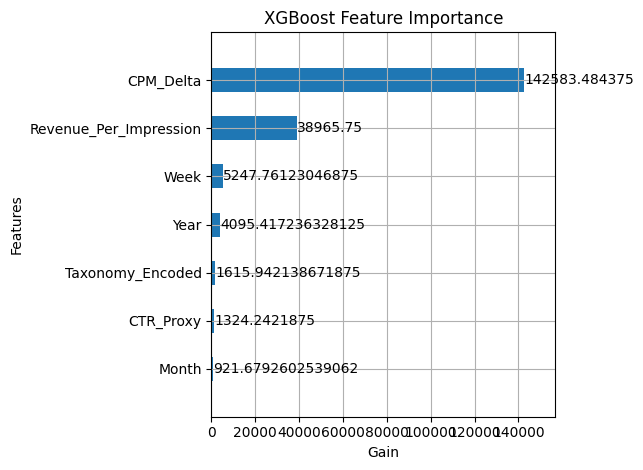

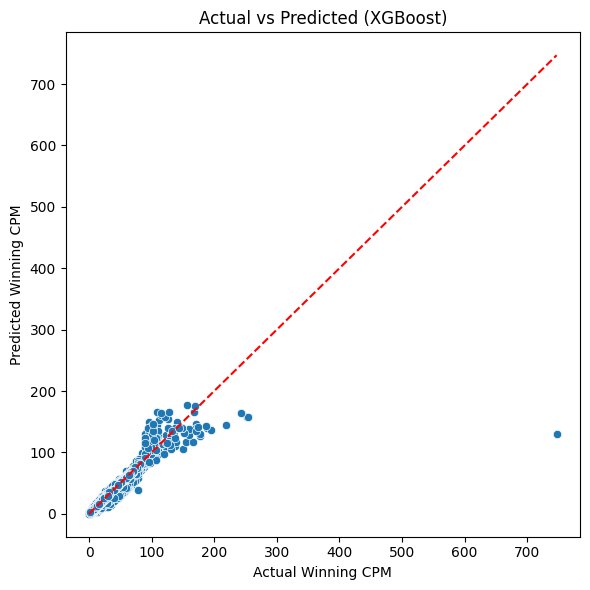

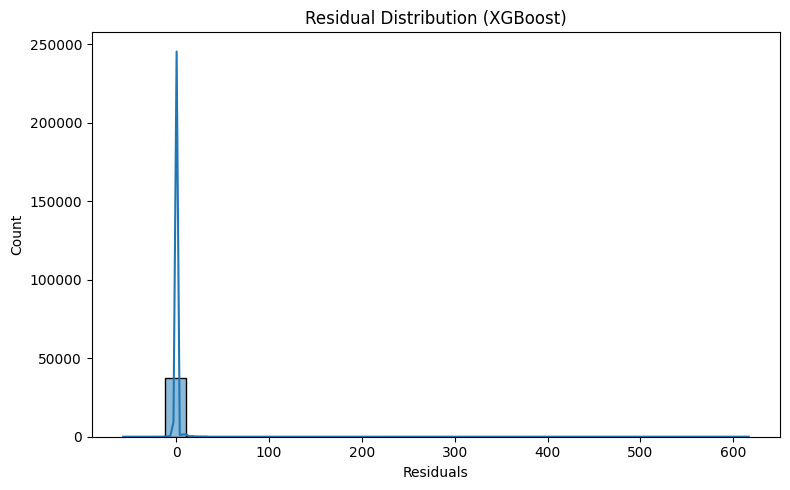

XGBoost model saved as 'xgboost_model.pkl'


In [2]:
# Step 1: Install xgboost if not installed
# Uncomment below if you haven't installed xgboost yet
# !pip install xgboost

# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Define Features and Target
features = [
    "Revenue_Per_Impression",
    "CPM_Delta",
    "CTR_Proxy",
    "Week",
    "Month",
    "Year",
    "Taxonomy_Encoded"
]
target = "Winning CPM"

X = df[features]
y = df[target]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost model trained.")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 7: Feature Importance Plot
xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance', xlabel='Gain', height=0.5)
plt.tight_layout()
plt.show()

# Step 8: Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Winning CPM")
plt.ylabel("Predicted Winning CPM")
plt.title("Actual vs Predicted (XGBoost)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

# Step 9: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# Step 10: Save Model
joblib.dump(xgb_model, "xgboost_model.pkl")
print("XGBoost model saved as 'xgboost_model.pkl'")


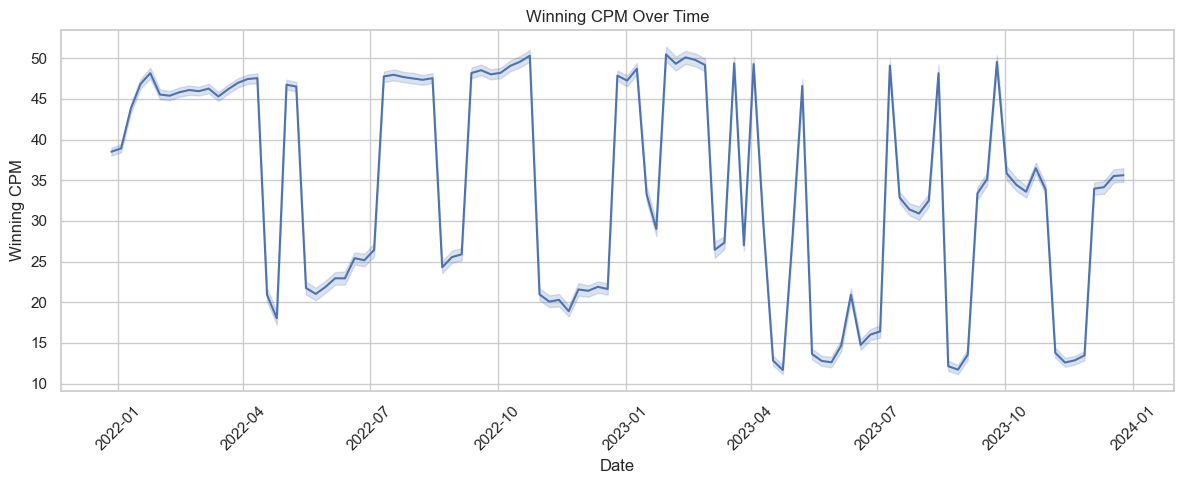

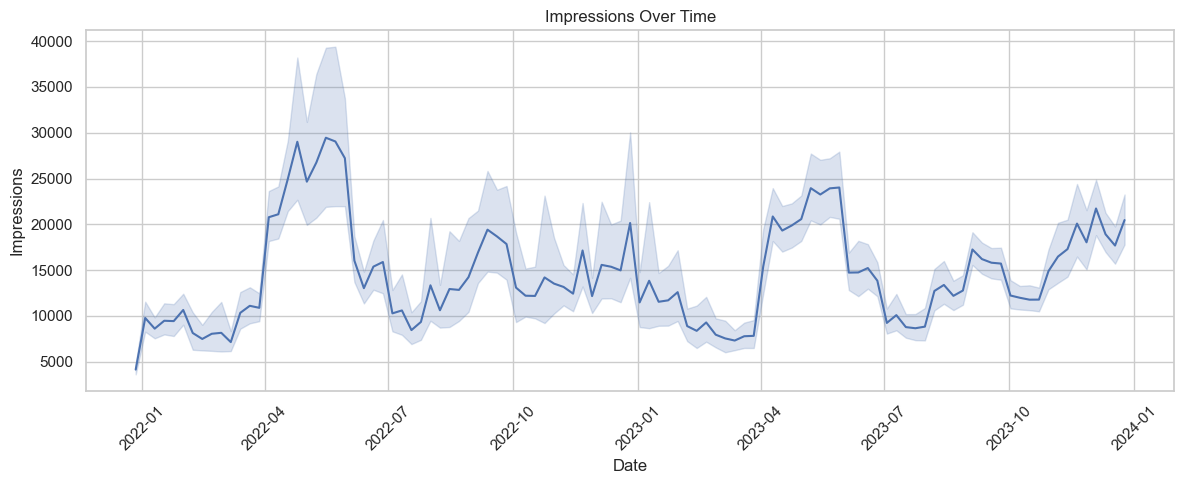

In [3]:
# Step 1: Import Required Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Set Plot Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# Step 3: Line Plot of Winning CPM Over Time
plt.figure()
sns.lineplot(data=df, x="Date", y="Winning CPM")
plt.title("Winning CPM Over Time")
plt.xlabel("Date")
plt.ylabel("Winning CPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Line Plot of Impressions Over Time
plt.figure()
sns.lineplot(data=df, x="Date", y="Impressions")
plt.title("Impressions Over Time")
plt.xlabel("Date")
plt.ylabel("Impressions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


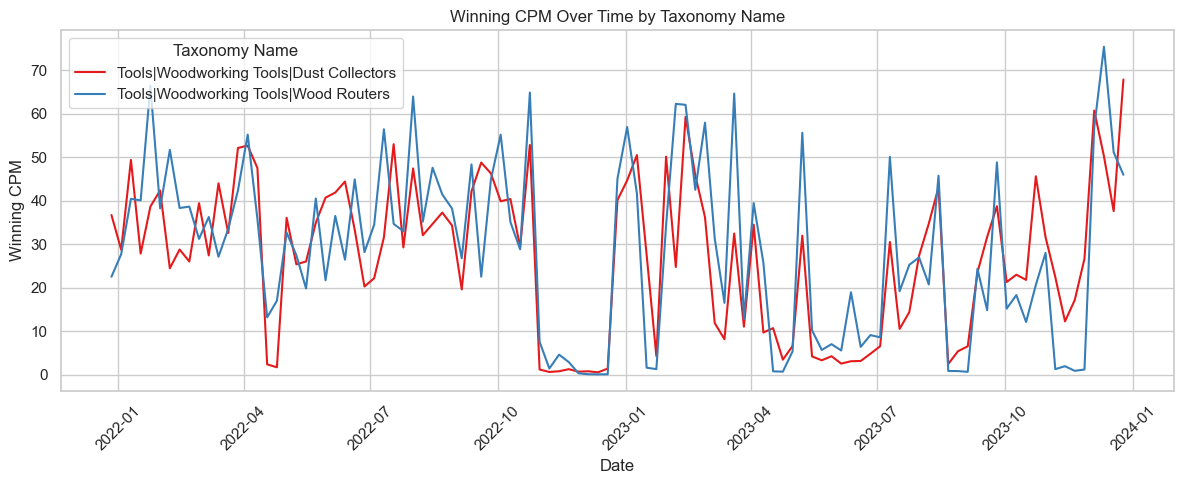

In [4]:
# Filter top 2 most frequent Taxonomy Names
top_taxonomies = df["Taxonomy Name"].value_counts().nlargest(2).index
df_subset = df[df["Taxonomy Name"].isin(top_taxonomies)]

# Plot by Taxonomy Name
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_subset, x="Date", y="Winning CPM", hue="Taxonomy Name", palette="Set1")
plt.title("Winning CPM Over Time by Taxonomy Name")
plt.xlabel("Date")
plt.ylabel("Winning CPM")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.metrics import mutual_info_score
import numpy as np
from IPython.display import display

# Step 2: Function to safely compute mutual information for numeric/categorical features
def compute_iv_score(feature_col, target_binned):
    try:
        return mutual_info_score(feature_col, target_binned)
    except:
        return np.nan

# Step 3: Bin the Target Variable
# Bin 'Winning CPM' into deciles
target_binned = pd.qcut(y, q=10, duplicates='drop')

# Step 4: Compute IV Scores for All Features
iv_scores = {
    col: compute_iv_score(X[col], target_binned)
    for col in X.columns
}

# Step 5: Create DataFrame and Sort
iv_df = pd.DataFrame(list(iv_scores.items()), columns=["Feature", "IV_Score"])
iv_df = iv_df.sort_values(by="IV_Score", ascending=False)

# Step 6: Display in Notebook and Save to Excel
display(iv_df)

iv_df.to_excel("information_value_report.xlsx", index=False)
print("Information Value report saved as 'information_value_report.xlsx'")


C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  warnings.warn(msg, UserWarning)
C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  warnings.warn(msg, UserWarning)


,Feature,IV_Score
1,CPM_Delta,2.283092
2,CTR_Proxy,2.214648
3,Week,0.242878
6,Taxonomy_Encoded,0.140183
4,Month,0.124571
5,Year,0.023887
0,Revenue_Per_Impression,NaN


Information Value report saved as 'information_value_report.xlsx'


Simulated Revenue Uplift: $4,130,325.90


,Date,Taxonomy_Encoded,Winning CPM,Predicted_CPM,Recommended_Floor_CPM,Simulated_CPM,Actual_Revenue,Simulated_Revenue
0,2021-12-27,0,35.6850,39.433533,8.440016,39.433533,3355.416301,3707.886184
1,2022-01-03,0,43.0220,43.597687,20.635598,43.597687,7893.534587,7999.159696
2,2022-01-10,0,42.3200,43.928402,28.402620,43.928402,3909.127601,4057.696798
3,2022-01-17,0,61.2000,61.487682,62.217013,62.217013,7801.589952,7931.235723
4,2022-01-24,0,39.1298,43.237850,43.890346,43.890346,3908.071558,4383.528952


Saved simulated results to 'simulated_results.csv'


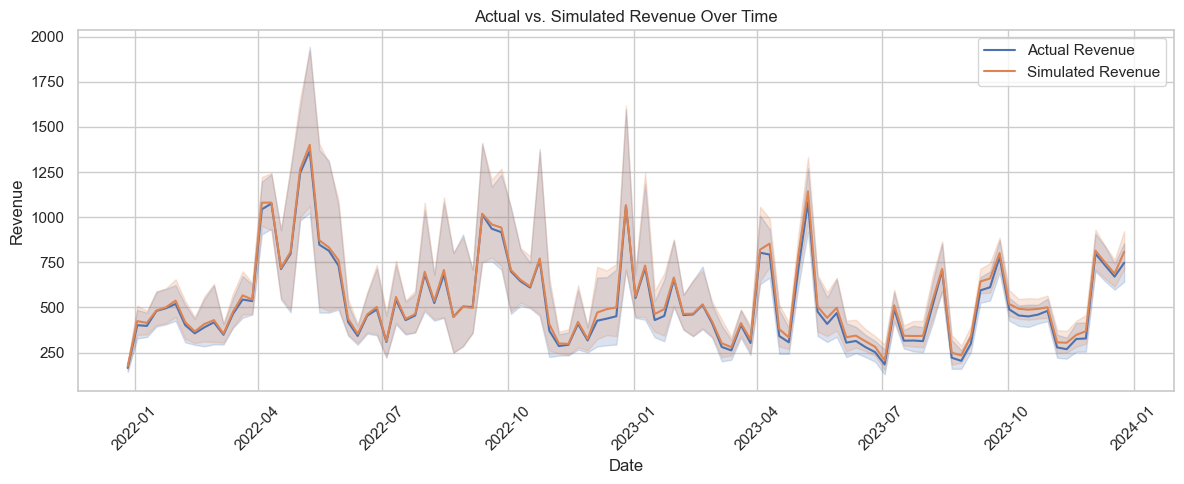

,Actual,Simulated,Uplift
Taxonomy_Encoded,,,
628,8.318554e+06,8.438164e+06,119610.015194
1194,5.221948e+05,5.880574e+05,65862.592872
0,4.054768e+05,4.649105e+05,59433.719477
119,1.153924e+06,1.209856e+06,55931.260990
1231,8.951629e+05,9.440849e+05,48922.032127
...,...,...,...
11,3.098492e+05,2.656201e+05,-44229.190449
1710,4.572172e+05,4.080248e+05,-49192.436705
238,2.569378e+05,1.976409e+05,-59296.927593


,Actual,Simulated,Uplift
Month,,,
2021-12,2.800903e+05,2.951291e+05,15038.754328
2022-01,4.069539e+06,4.183827e+06,114288.796538
2022-02,2.612273e+06,2.708280e+06,96006.510925
2022-03,3.290665e+06,3.375035e+06,84369.868918
2022-04,6.427187e+06,6.533247e+06,106060.080209
2022-05,8.728017e+06,8.950790e+06,222772.279493
2022-06,3.043279e+06,3.132752e+06,89473.483804
2022-07,3.122019e+06,3.180812e+06,58792.352188
2022-08,4.951394e+06,5.033470e+06,82076.092965


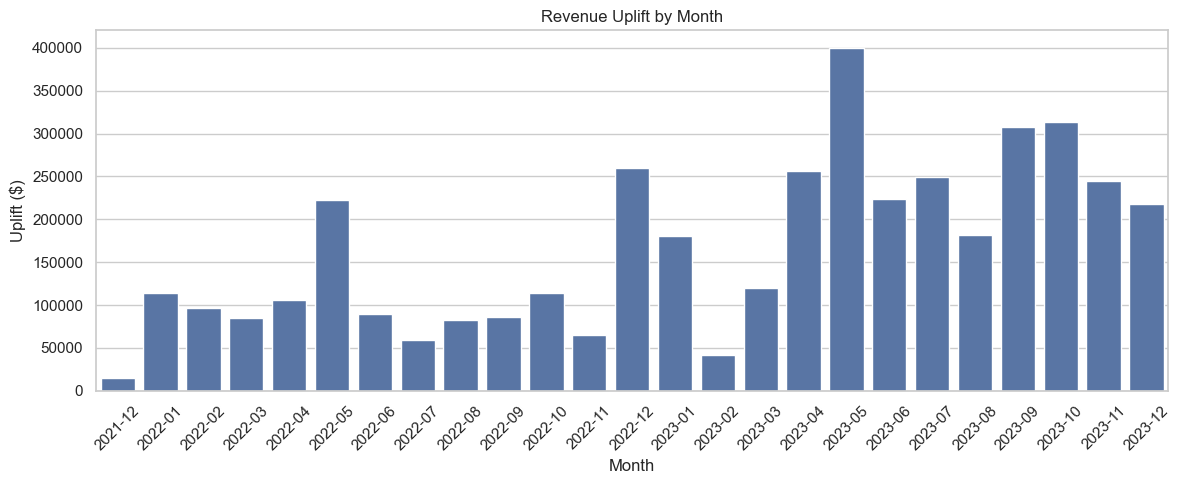

In [7]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 2: Load Trained XGBoost Model (if not already loaded)
xgb_model = joblib.load("xgboost_model.pkl")  # Ensure this path is correct

# Step 3: Predict Winning CPM using the trained model
df["Predicted_CPM"] = xgb_model.predict(X)

# Step 4: Calculate Recommended Floor CPM (25th percentile) by Taxonomy and Week
recommended_floors = (
    df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"]
      .quantile(0.25)
      .reset_index()
      .rename(columns={"Predicted_CPM": "Recommended_Floor_CPM"})
)

# Step 5: Merge Recommendations Back into Main DataFrame
df = df.merge(recommended_floors, on=["Taxonomy_Encoded", "Week"], how="left")

# Step 6: Simulate New CPMs and Revenue
df["Simulated_CPM"]     = np.maximum(df["Predicted_CPM"], df["Recommended_Floor_CPM"])
df["Actual_Revenue"]    = df["Winning CPM"] * df["Impressions"] / 1000
df["Simulated_Revenue"] = df["Simulated_CPM"]  * df["Impressions"] / 1000

# Step 7: Calculate and Display Overall Uplift
uplift = df["Simulated_Revenue"].sum() - df["Actual_Revenue"].sum()
print(f"Simulated Revenue Uplift: ${uplift:,.2f}")

# Step 8: Preview Results
display(df[[
    "Date", "Taxonomy_Encoded", "Winning CPM", "Predicted_CPM",
    "Recommended_Floor_CPM", "Simulated_CPM", "Actual_Revenue", "Simulated_Revenue"
]].head())

# Step 9: Save Results to CSV
df.to_csv("simulated_results.csv", index=False)
print("Saved simulated results to 'simulated_results.csv'")

# Step 10: Plot Actual vs. Simulated Revenue Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="Date", y="Actual_Revenue", label="Actual Revenue")
sns.lineplot(data=df, x="Date", y="Simulated_Revenue", label="Simulated Revenue")
plt.title("Actual vs. Simulated Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 11: Summarize Uplift by Taxonomy
by_tax = (
    df.groupby("Taxonomy_Encoded")
      .agg(Actual=("Actual_Revenue", "sum"), Simulated=("Simulated_Revenue", "sum"))
      .assign(Uplift=lambda d: d["Simulated"] - d["Actual"])
      .sort_values("Uplift", ascending=False)
)
display(by_tax)

# Step 12: Summarize Uplift by Month
df["Month"] = df["Date"].dt.to_period("M").astype(str)
by_month = (
    df.groupby("Month")
      .agg(Actual=("Actual_Revenue", "sum"), Simulated=("Simulated_Revenue", "sum"))
      .assign(Uplift=lambda d: d["Simulated"] - d["Actual"])
      .sort_index()
)
display(by_month)

# Step 13: Plot Uplift by Month
plt.figure(figsize=(12, 5))
sns.barplot(data=by_month.reset_index(), x="Month", y="Uplift")
plt.title("Revenue Uplift by Month")
plt.xlabel("Month")
plt.ylabel("Uplift ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Uplift by Taxonomy and Week
segment_uplift = (
    df.groupby(["Taxonomy_Encoded", "Week"])
      .agg(Actual=("Actual_Revenue", "sum"), Simulated=("Simulated_Revenue", "sum"))
      .assign(Uplift=lambda d: d["Simulated"] - d["Actual"])
      .reset_index()
)
print(segment_uplift)

        Taxonomy_Encoded  Week        Actual     Simulated       Uplift
0                      0     1   8918.337089  10299.391639  1381.054550
1                      0     2   8840.142097  10637.684983  1797.542886
2                      0     3  19393.857518  19338.766387   -55.091131
3                      0     4  10067.591711  10501.658930   434.067219
4                      0     5  29653.731680  30217.796446   564.064766
...                  ...   ...           ...           ...          ...
102858              2258    44     19.892063     20.295211     0.403148
102859              2258    49     28.068788     28.777065     0.708277
102860              2258    50     20.689074     20.656167    -0.032907
102861              2258    51    121.825846    121.407350    -0.418496
102862              2258    52    361.806970    363.004248     1.197278

[102863 rows x 5 columns]


C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


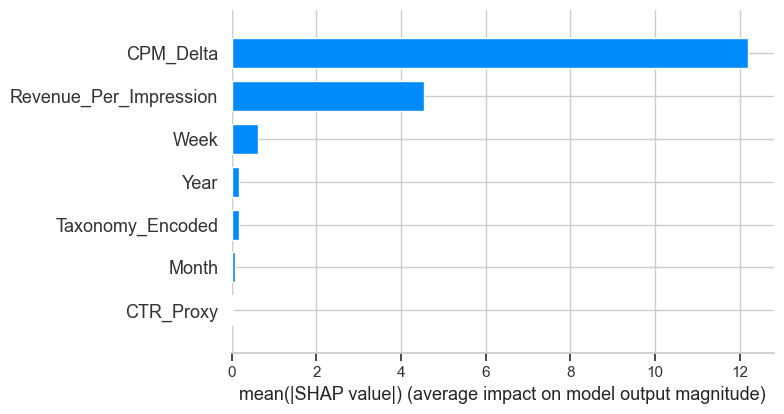

In [9]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


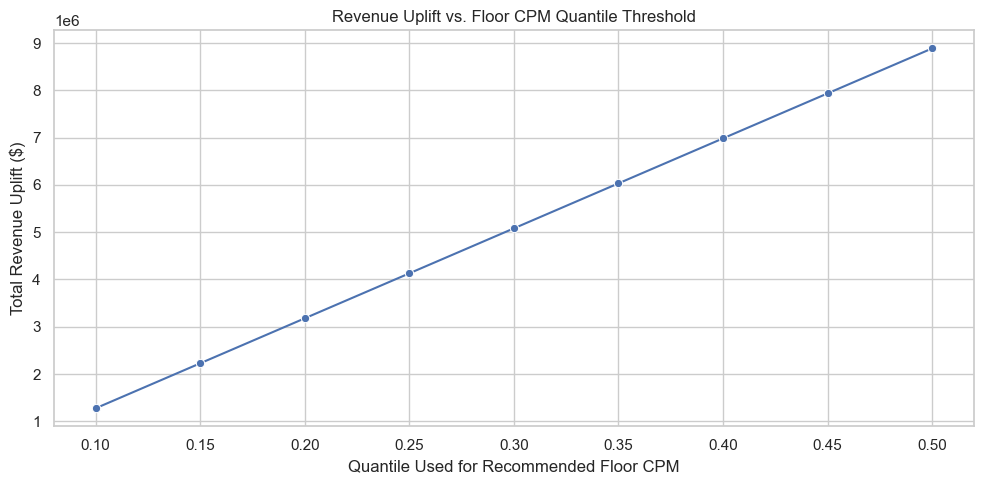

,Quantile,Revenue_Uplift
0,0.10,1.275994e+06
1,0.15,2.227438e+06
2,0.20,3.178882e+06
3,0.25,4.130326e+06
4,0.30,5.081770e+06
5,0.35,6.033214e+06
6,0.40,6.984658e+06
7,0.45,7.936102e+06
8,0.50,8.887546e+06


In [10]:
# Step 1: Define quantiles to test
quantile_cutoffs = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
uplift_results = []

# Step 2: Add base revenue column if missing
if "Actual_Revenue" not in df.columns:
    df["Actual_Revenue"] = df["Winning CPM"] * df["Impressions"] / 1000

# Step 3: Loop through quantiles
for q in quantile_cutoffs:
    # Compute new floor recommendations for the quantile
    recommended_floors = (
        df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"]
          .quantile(q)
          .reset_index()
          .rename(columns={f"Predicted_CPM": f"Recommended_Floor_CPM_{int(q*100)}"})
    )

    # Merge into a copy of df to avoid overwriting
    df_sim = df.copy()
    df_sim = df_sim.merge(
        recommended_floors,
        on=["Taxonomy_Encoded", "Week"],
        how="left"
    )

    # Safely extract the column name we just created
    floor_col = f"Recommended_Floor_CPM_{int(q*100)}"
    if floor_col not in df_sim.columns:
        print(f"Warning: '{floor_col}' not found after merge.")
        continue

    # Simulate CPM and revenue
    df_sim["Simulated_CPM"] = np.maximum(df_sim["Predicted_CPM"], df_sim[floor_col])
    df_sim["Simulated_Revenue"] = df_sim["Simulated_CPM"] * df_sim["Impressions"] / 1000

    # Calculate total uplift
    uplift = df_sim["Simulated_Revenue"].sum() - df_sim["Actual_Revenue"].sum()
    uplift_results.append((q, uplift))

# Step 4: Convert results to DataFrame
uplift_df = pd.DataFrame(uplift_results, columns=["Quantile", "Revenue_Uplift"])

# Step 5: Plot uplift vs quantile
plt.figure(figsize=(10, 5))
sns.lineplot(data=uplift_df, x="Quantile", y="Revenue_Uplift", marker="o")
plt.title("Revenue Uplift vs. Floor CPM Quantile Threshold")
plt.xlabel("Quantile Used for Recommended Floor CPM")
plt.ylabel("Total Revenue Uplift ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display uplift values
display(uplift_df)


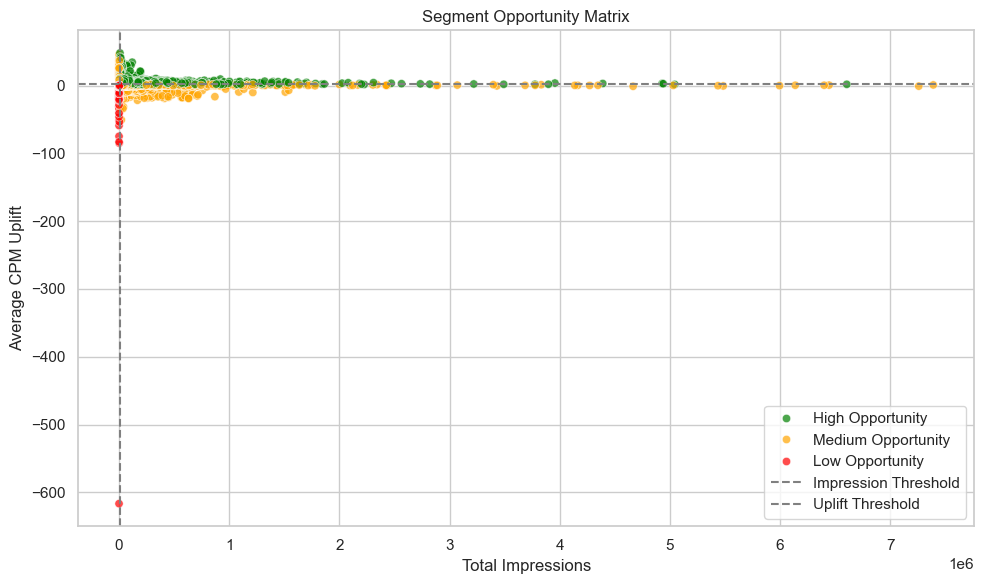

,Taxonomy_Encoded,Week,Avg_CPM_Uplift,Total_Impressions,Total_Revenue_Uplift,Opportunity_Level
28724,628,43,1.875527,6605651.22,442746.509576,High Opportunity
28712,628,31,1.727692,5043810.33,270224.468698,High Opportunity
28716,628,35,2.730202,4939803.66,325356.786437,High Opportunity
28714,628,33,3.107155,4929911.08,320295.130465,High Opportunity
28699,628,18,3.030435,4390640.74,264915.624778,High Opportunity
28718,628,37,3.699283,3956513.98,274738.961514,High Opportunity
28725,628,44,1.968128,3897665.24,201042.383689,High Opportunity
28709,628,28,1.921581,3775808.26,178999.748869,High Opportunity
28719,628,38,1.897249,3491800.41,156381.010776,High Opportunity
28728,628,47,2.341183,3219901.80,128335.984247,High Opportunity


In [11]:
# Step 1: Ensure Revenue and Uplift Columns Exist
df["Actual_Revenue"] = df["Winning CPM"] * df["Impressions"] / 1000
df["Simulated_CPM"] = np.maximum(df["Predicted_CPM"], df["Recommended_Floor_CPM"])
df["Simulated_Revenue"] = df["Simulated_CPM"] * df["Impressions"] / 1000
df["CPM_Uplift"] = df["Simulated_CPM"] - df["Winning CPM"]

# Step 2: Aggregate Metrics by Taxonomy_Encoded and Week
segment_summary = (
    df.groupby(["Taxonomy_Encoded", "Week"])
      .agg(
          Avg_CPM_Uplift=("CPM_Uplift", "mean"),
          Total_Impressions=("Impressions", "sum"),
          Total_Revenue_Uplift=("Simulated_Revenue", "sum")
      )
      .reset_index()
)

# Step 3: Define Thresholds
uplift_threshold = segment_summary["Avg_CPM_Uplift"].median()
impression_threshold = segment_summary["Total_Impressions"].median()

# Step 4: Label Opportunity Levels
def label_opportunity(row):
    if row["Avg_CPM_Uplift"] >= uplift_threshold and row["Total_Impressions"] >= impression_threshold:
        return "High Opportunity"
    elif row["Avg_CPM_Uplift"] < uplift_threshold and row["Total_Impressions"] < impression_threshold:
        return "Low Opportunity"
    else:
        return "Medium Opportunity"

segment_summary["Opportunity_Level"] = segment_summary.apply(label_opportunity, axis=1)

# Step 5: Quadrant Scatterplot of Opportunity
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=segment_summary,
    x="Total_Impressions",
    y="Avg_CPM_Uplift",
    hue="Opportunity_Level",
    palette={"High Opportunity": "green", "Medium Opportunity": "orange", "Low Opportunity": "red"},
    alpha=0.7
)
plt.axvline(x=impression_threshold, color="gray", linestyle="--", label="Impression Threshold")
plt.axhline(y=uplift_threshold, color="gray", linestyle="--", label="Uplift Threshold")
plt.title("Segment Opportunity Matrix")
plt.xlabel("Total Impressions")
plt.ylabel("Average CPM Uplift")
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Display Top 10 High Opportunity Segments
high_opportunities = segment_summary[segment_summary["Opportunity_Level"] == "High Opportunity"]
top_segments = high_opportunities.sort_values(by="Total_Impressions", ascending=False).head(10)
display(top_segments)




In [14]:
# Step 1: Import Required Libraries (if needed)
import numpy as np
import pandas as pd

# Step 2: Compute Ad Cost per Impression
df["Ad_Cost_per_Impression"] = df["Ad Spend"] / df["Impressions"]

# Step 3: Compute Actual Revenue per Impression and ROI
df["Actual_Revenue_per_Impression"] = df["Winning CPM"] / 1000  # CPM → revenue per impression
df["Actual_ROI"] = (df["Actual_Revenue_per_Impression"] - df["Ad_Cost_per_Impression"]) / df["Ad_Cost_per_Impression"]

# Step 4: Predict CPM using trained model
df["Predicted_CPM"] = xgb_model.predict(X)
df["Predicted_Revenue_per_Impression"] = df["Predicted_CPM"] / 1000
df["Predicted_ROI"] = (df["Predicted_Revenue_per_Impression"] - df["Ad_Cost_per_Impression"]) / df["Ad_Cost_per_Impression"]

# Step 5: Recommend Floor CPMs Based on ROI Optimization
# Use 25th percentile of ROI within each Taxonomy_Encoded and Week
recommended_roi_floors = (
    df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_ROI"]
      .quantile(0.25)
      .reset_index()
      .rename(columns={"Predicted_ROI": "Recommended_ROI_Threshold"})
)
df = df.merge(recommended_roi_floors, on=["Taxonomy_Encoded", "Week"], how="left")

# Step 6: Filter to rows exceeding the ROI threshold
df["Passes_ROI_Threshold"] = df["Predicted_ROI"] >= df["Recommended_ROI_Threshold"]

# Step 7: Recommend ROI-Conscious Floor CPMs (25th percentile of predicted CPMs for qualifying rows)
recommended_floor_cpms_roi = (
    df[df["Passes_ROI_Threshold"]]
    .groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"]
    .quantile(0.25)
    .reset_index()
    .rename(columns={"Predicted_CPM": "Recommended_Floor_CPM_ROI"})
)
df = df.merge(recommended_floor_cpms_roi, on=["Taxonomy_Encoded", "Week"], how="left")

# Step 8: Simulate ROI-Aware Pricing Strategy
df["Simulated_CPM_ROI"] = np.maximum(df["Predicted_CPM"], df["Recommended_Floor_CPM_ROI"])
df["Simulated_Revenue_ROI"] = df["Simulated_CPM_ROI"] * df["Impressions"] / 1000
df["Simulated_ROI"] = (df["Simulated_Revenue_ROI"] / df["Ad Spend"]) - 1

# Step 9: Evaluate Total ROI-Based Uplift
roi_uplift = df["Simulated_Revenue_ROI"].sum() - df["Actual_Revenue"].sum()
mean_roi_improvement = df["Simulated_ROI"].mean() - df["Actual_ROI"].mean()

print(f"Total Revenue Uplift from ROI-Based Floor CPM: ${roi_uplift:,.2f}")
print(f"Average ROI Improvement: {mean_roi_improvement:.4f}")


Total Revenue Uplift from ROI-Based Floor CPM: $7,658,708.57
Average ROI Improvement: 0.5887


,Group,mean,std,count
0,Control,0.033647,0.020559,94797
1,Treatment,0.035653,0.019082,94906


T-statistic: 22.0166
P-value: 0.000000
✅ The difference is statistically significant at 95% confidence level.


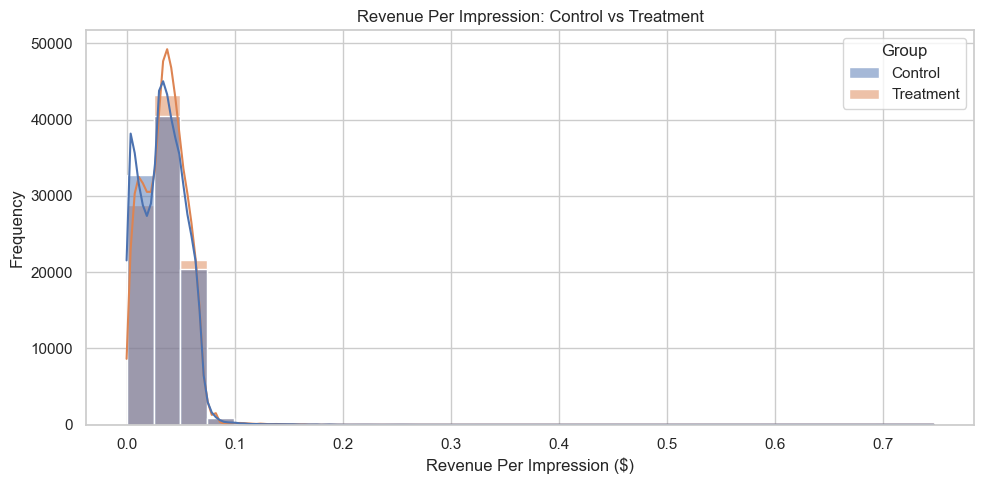

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add A/B Assignment Column
np.random.seed(42)  # for reproducibility
df["Group"] = np.random.choice(["Control", "Treatment"], size=len(df), replace=True)

# Step 2: Define Revenue Per Impression Based on Group Assignment
# Use Actual CPM for Control, Simulated CPM (from recommendation) for Treatment
df["Revenue_Per_Impression_AB"] = np.where(
    df["Group"] == "Control",
    df["Winning CPM"] / 1000,  # actual CPM → revenue per impression
    df["Simulated_CPM"] / 1000  # simulated strategy
)

# Step 3: Compute Summary Stats
summary = df.groupby("Group")["Revenue_Per_Impression_AB"].agg(["mean", "std", "count"]).reset_index()
display(summary)

# Step 4: Run Independent T-Test
control_vals = df[df["Group"] == "Control"]["Revenue_Per_Impression_AB"]
treatment_vals = df[df["Group"] == "Treatment"]["Revenue_Per_Impression_AB"]

t_stat, p_value = ttest_ind(treatment_vals, control_vals, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ The difference is statistically significant at 95% confidence level.")
else:
    print("⚠️ The difference is NOT statistically significant.")

# Step 5: Optional Plot - Revenue Per Impression Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Revenue_Per_Impression_AB", hue="Group", kde=True, bins=30)
plt.title("Revenue Per Impression: Control vs Treatment")
plt.xlabel("Revenue Per Impression ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


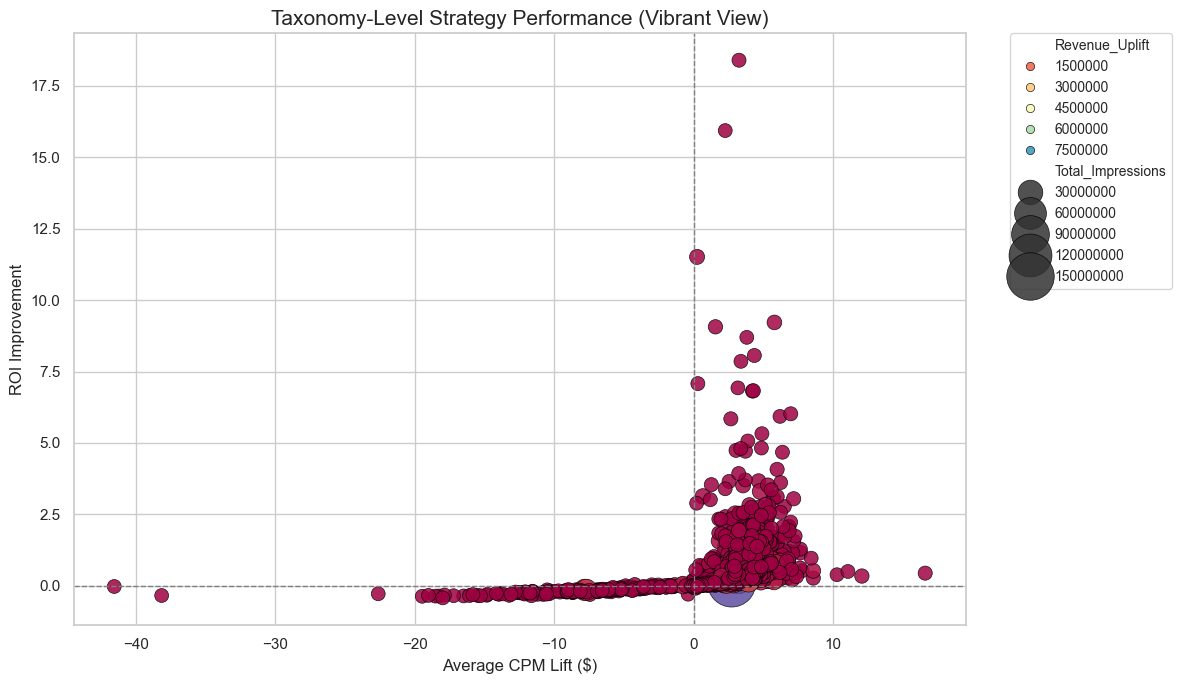

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure required metrics are computed in df
df["Actual_Revenue"] = df["Winning CPM"] * df["Impressions"] / 1000
df["Simulated_Revenue"] = df["Simulated_CPM_ROI"] * df["Impressions"] / 1000
df["CPM_Lift"] = df["Simulated_CPM_ROI"] - df["Winning CPM"]

# Step 2: Compute ROI
df["Actual_ROI"] = (df["Winning CPM"] / 1000 - df["Ad Spend"] / df["Impressions"]) / (df["Ad Spend"] / df["Impressions"])
df["Simulated_ROI"] = (df["Simulated_CPM_ROI"] / 1000 - df["Ad Spend"] / df["Impressions"]) / (df["Ad Spend"] / df["Impressions"])
df["ROI_Improvement"] = df["Simulated_ROI"] - df["Actual_ROI"]

# Step 3: Aggregate at taxonomy level
taxonomy_summary = (
    df.groupby("Taxonomy_Encoded")
      .agg(
          Avg_CPM_Lift=("CPM_Lift", "mean"),
          ROI_Improvement=("ROI_Improvement", "mean"),
          Total_Impressions=("Impressions", "sum"),
          Revenue_Uplift=("Simulated_Revenue", "sum")
      )
      .reset_index()
)

# Step 4: Plot taxonomy-level scatterplot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=taxonomy_summary,
    x="Avg_CPM_Lift",
    y="ROI_Improvement",
    hue="Revenue_Uplift",
    size="Total_Impressions",
    palette="Spectral",
    sizes=(100, 1200),
    edgecolor="black",
    linewidth=0.5,
    alpha=0.85,
    legend="brief"
)

# Add axis reference lines
plt.axvline(x=0, color="gray", linestyle="--", linewidth=1)
plt.axhline(y=0, color="gray", linestyle="--", linewidth=1)

# Add labels and legend
plt.title("Taxonomy-Level Strategy Performance (Vibrant View)", fontsize=15)
plt.xlabel("Average CPM Lift ($)", fontsize=12)
plt.ylabel("ROI Improvement", fontsize=12)

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0., fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Step 1: Load your model and test data
model = joblib.load("xgboost_model.pkl")  # Update if using another model
X_sample = X_test.copy()
y_sample = y_test.copy()

# Step 2: SHAP using TreeExplainer (CPU-friendly for tree models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# Step 3: SHAP summary plot (bar)
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("Top 5 SHAP Features Driving CPM")
plt.savefig("shap_summary_plot.png", bbox_inches="tight")
plt.close()

# Step 4: Save Top 5 SHAP Features
shap_df = pd.DataFrame(shap_values, columns=X_sample.columns)
mean_shap = shap_df.abs().mean().sort_values(ascending=False).head(5).reset_index()
mean_shap.columns = ["Feature", "Mean_SHAP_Value"]
mean_shap.to_csv("top_5_shap_features.csv", index=False)

# Step 5: Revenue Uplift Summary
df["Actual_Revenue"] = df["Winning CPM"] * df["Impressions"] / 1000
df["Simulated_Revenue"] = df["Simulated_CPM"] * df["Impressions"] / 1000

baseline_revenue = df["Actual_Revenue"].sum()
simulated_revenue = df["Simulated_Revenue"].sum()
uplift_amount = simulated_revenue - baseline_revenue
uplift_pct = (uplift_amount / baseline_revenue) * 100

revenue_summary = pd.DataFrame({
    "Metric": ["Baseline Revenue", "Simulated Revenue", "Total Uplift ($)", "Total Uplift (%)"],
    "Value": [baseline_revenue, simulated_revenue, uplift_amount, uplift_pct]
})
revenue_summary.to_csv("revenue_summary.csv", index=False)

# Step 6: Display in Notebook
from IPython.display import display

print("📊 Revenue Summary:")
display(revenue_summary)

print("\n📈 Top 5 SHAP Features Driving CPM:")
display(mean_shap)


C:\Users\dshak\AppData\Local\Temp\ipykernel_22028\2387399994.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)


📊 Revenue Summary:


,Metric,Value
0,Baseline Revenue,9.995492e+07
1,Simulated Revenue,1.040853e+08
2,Total Uplift ($),4.130326e+06
3,Total Uplift (%),4.132189e+00



📈 Top 5 SHAP Features Driving CPM:


,Feature,Mean_SHAP_Value
0,CPM_Delta,12.197759
1,Revenue_Per_Impression,4.544667
2,Week,0.617922
3,Year,0.176990
4,Taxonomy_Encoded,0.164850


In [20]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Step 3: Define Features and Target
features = [
    "Revenue_Per_Impression",
    "CPM_Delta",
    "CTR_Proxy",
    "Week",
    "Month",
    "Year",
    "Taxonomy_Encoded"
]
target = "Winning CPM"

X = df[features]
y = df[target]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align test and train sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [24]:
# Step 5: Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [25]:
# Step 6: Predict and Evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost model trained.")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

XGBoost model trained.
RMSE: 3.9663
R² Score: 0.9628


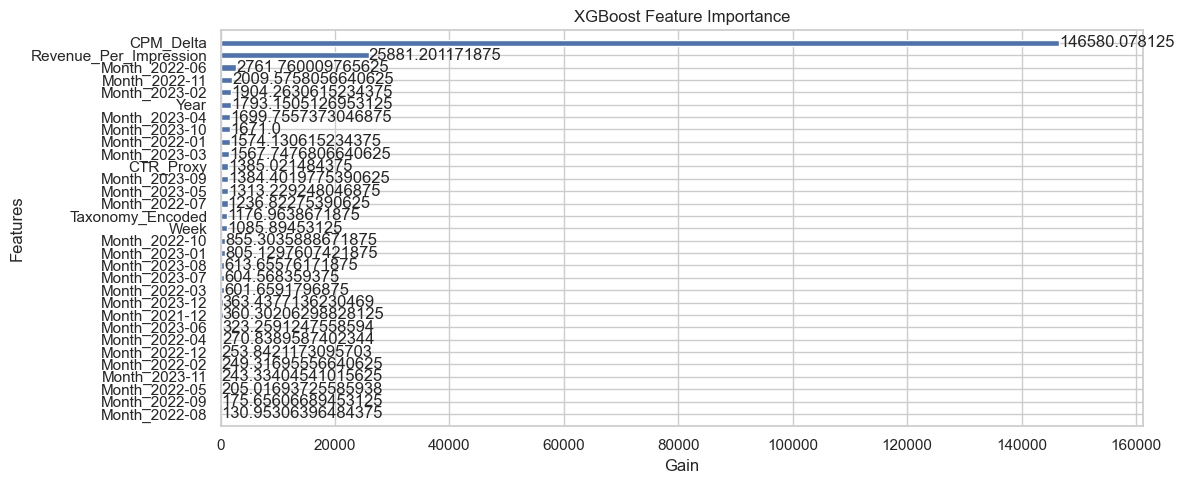

In [26]:
# Step 7: Feature Importance Plot
xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance', xlabel='Gain', height=0.5)
plt.tight_layout()
plt.show()


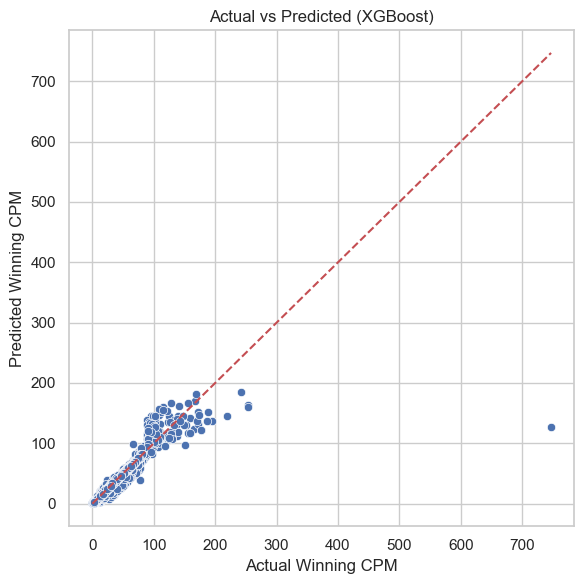

In [27]:
# Step 8: Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Winning CPM")
plt.ylabel("Predicted Winning CPM")
plt.title("Actual vs Predicted (XGBoost)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

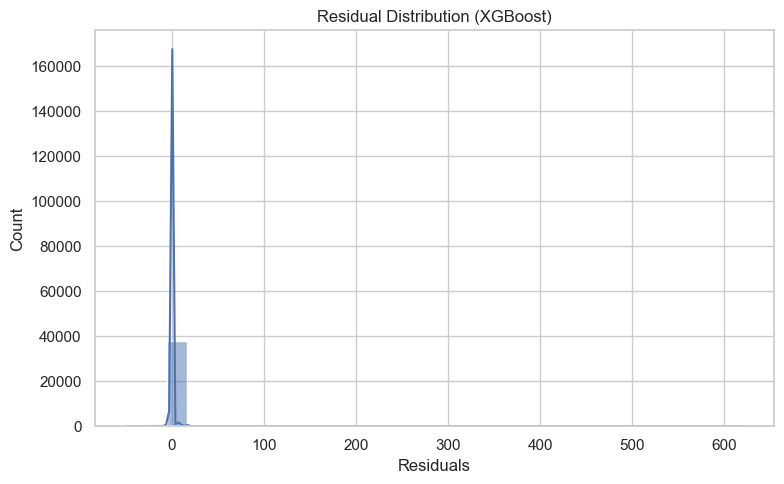

In [28]:
# Step 9: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

In [29]:
# Step 10: Save the trained XGBoost model
import joblib

# Save the model to a file
model_filename = "xgboost_model.pkl"
joblib.dump(xgb_model, model_filename)

print(f"XGBoost model saved as '{model_filename}'")


XGBoost model saved as 'xgboost_model.pkl'


In [30]:
# Load the model
loaded_model = joblib.load("xgboost_model.pkl")

# Make predictions (e.g., on X_test)
y_pred = loaded_model.predict(X_test)


C:\Users\dshak\AppData\Local\Temp\ipykernel_22028\1464162096.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


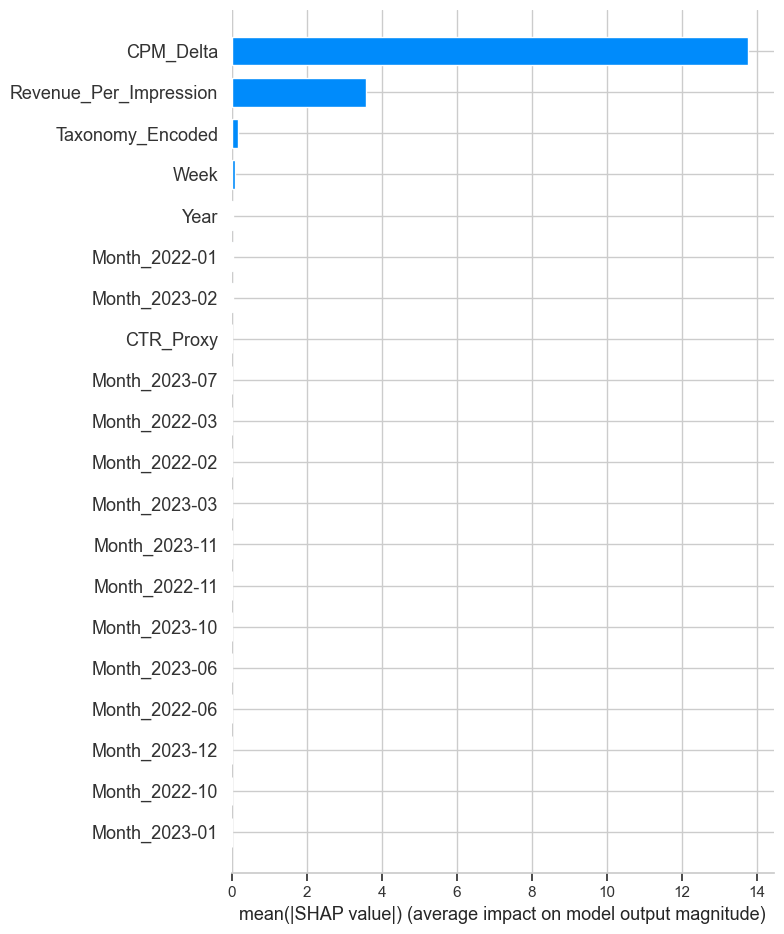

In [35]:
import shap
import matplotlib.pyplot as plt

# Step 1: Use the trained XGBoost model instead of undefined 'rf'
explainer = shap.Explainer(xgb_model)

# Step 2: Compute SHAP values
shap_values = explainer(X_test)

# Step 3: Create a bar plot for mean absolute SHAP values per feature
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [36]:
print(df.columns.tolist())


['Date', 'Taxonomy Name', 'Campaign ID', 'Traffic', 'Winning CPM', 'Floor CPM', 'Budget', 'Ad Spend', 'Impressions', 'Sales', 'Revenue_Per_Impression', 'CPM_Delta', 'CTR_Proxy', 'Week', 'Month', 'Year', 'Taxonomy_Encoded', 'Predicted_CPM', 'Recommended_Floor_CPM', 'Simulated_CPM', 'Actual_Revenue', 'Simulated_Revenue', 'CPM_Uplift', 'Ad_Cost_per_Impression', 'Actual_Revenue_per_Impression', 'Actual_ROI', 'Group', 'Revenue_Per_Impression_AB', 'Predicted_Revenue_per_Impression', 'Predicted_ROI', 'Recommended_ROI_Threshold', 'Passes_ROI_Threshold', 'Recommended_Floor_CPM_ROI', 'Simulated_CPM_ROI', 'Simulated_Revenue_ROI', 'Simulated_ROI', 'CPM_Lift', 'ROI_Improvement']


In [38]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import joblib

# Step 2: Load trained XGBoost model (if not already in memory)
# xgb_model = joblib.load("xgb_model.pkl")  # Uncomment if needed

# Step 3: Make a copy of the input DataFrame
df_predict = df.copy()

# Step 4: Convert 'Month' and 'Year' to string for one-hot encoding consistency
df_predict["Month"] = df_predict["Month"].astype(str)
df_predict["Year"] = df_predict["Year"].astype(str)

# Step 5: Apply one-hot encoding (must match training-time encoding)
df_predict_encoded = pd.get_dummies(df_predict)

# Step 6: Align prediction columns with training set columns
# Assumes you trained your model using a DataFrame called `X`
# and are still in the same environment. If not, load saved feature names:
# feature_columns = joblib.load("xgb_feature_columns.pkl")
# Replace the line below with: df_predict_aligned = df_predict_encoded.reindex(columns=feature_columns, fill_value=0)

df_predict_aligned = df_predict_encoded.reindex(columns=X.columns, fill_value=0)

# Step 7: Generate predictions
df["Predicted_CPM"] = xgb_model.predict(df_predict_aligned)

# Optional Step 8: Preview results
print("✅ Prediction completed. Sample output:")
display(df[["Date", "Taxonomy_Encoded", "Winning CPM", "Predicted_CPM"]].head())


ValueError: feature_names mismatch: ['Revenue_Per_Impression', 'CPM_Delta', 'CTR_Proxy', 'Week', 'Year', 'Taxonomy_Encoded', 'Month_2021-12', 'Month_2022-01', 'Month_2022-02', 'Month_2022-03', 'Month_2022-04', 'Month_2022-05', 'Month_2022-06', 'Month_2022-07', 'Month_2022-08', 'Month_2022-09', 'Month_2022-10', 'Month_2022-11', 'Month_2022-12', 'Month_2023-01', 'Month_2023-02', 'Month_2023-03', 'Month_2023-04', 'Month_2023-05', 'Month_2023-06', 'Month_2023-07', 'Month_2023-08', 'Month_2023-09', 'Month_2023-10', 'Month_2023-11', 'Month_2023-12'] ['Revenue_Per_Impression', 'CPM_Delta', 'CTR_Proxy', 'Week', 'Month', 'Year', 'Taxonomy_Encoded']
expected Month_2022-11, Month_2022-08, Month_2023-12, Month_2023-05, Month_2022-09, Month_2022-02, Month_2021-12, Month_2023-01, Month_2022-12, Month_2023-04, Month_2023-09, Month_2022-03, Month_2022-07, Month_2023-02, Month_2022-10, Month_2023-08, Month_2022-06, Month_2023-10, Month_2023-06, Month_2022-01, Month_2023-03, Month_2023-07, Month_2022-05, Month_2022-04, Month_2023-11 in input data
training data did not have the following fields: Month

In [40]:
df["Actual_Revenue"] = df["Winning CPM"] * df["Impressions"] / 1000
df["Simulated_Revenue"] = df["Simulated_CPM"] * df["Impressions"] / 1000
uplift = df["Simulated_Revenue"].sum() - df["Actual_Revenue"].sum()
print(f"Total Revenue Uplift: ${uplift:,.2f}")


Total Revenue Uplift: $4,130,325.90


In [41]:
quantile_cutoffs = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
uplift_results = []
for q in quantile_cutoffs:
    floor = df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"].quantile(q).reset_index()
    df_sim = df.merge(floor.rename(columns={"Predicted_CPM": "Floor"}), on=["Taxonomy_Encoded", "Week"], how="left")
    df_sim["Simulated"] = np.maximum(df_sim["Predicted_CPM"], df_sim["Floor"])
    df_sim["Simulated_Revenue"] = df_sim["Simulated"] * df_sim["Impressions"] / 1000
    uplift = df_sim["Simulated_Revenue"].sum() - df["Actual_Revenue"].sum()
    uplift_results.append((q, uplift))


In [43]:
segment_summary = df.groupby(["Taxonomy_Encoded", "Week"]).agg(
    Avg_CPM_Uplift=("CPM_Uplift", "mean"),
    Total_Impressions=("Impressions", "sum"),
    Revenue_Uplift=("Simulated_Revenue", "sum")
).reset_index()

# Define thresholds
i_thresh = segment_summary["Total_Impressions"].median()
u_thresh = segment_summary["Avg_CPM_Uplift"].median()

# Classify opportunity
segment_summary["Opportunity"] = segment_summary.apply(
    lambda row: "High Opportunity" if row["Avg_CPM_Uplift"] > u_thresh and row["Total_Impressions"] > i_thresh
    else ("Low Opportunity" if row["Avg_CPM_Uplift"] < u_thresh and row["Total_Impressions"] < i_thresh
    else "Medium Opportunity"), axis=1
)


In [44]:
df["Ad_Cost"] = df["Ad Spend"] / df["Impressions"]
df["Actual_ROI"] = (df["Actual_Revenue"] - df["Ad Spend"]) / df["Ad Spend"]
df["Simulated_ROI"] = (df["Simulated_Revenue"] - df["Ad Spend"]) / df["Ad Spend"]
roi_gain = df["Simulated_ROI"].mean() - df["Actual_ROI"].mean()
print(f"Average ROI Improvement: {roi_gain:.4f}")


Average ROI Improvement: 0.5667


In [45]:
quantile_cutoffs = [0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
uplift_results = []
for q in quantile_cutoffs:
    floors = df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"].quantile(q).reset_index()
    df_sim = df.merge(floors.rename(columns={"Predicted_CPM": "Floor"}), on=["Taxonomy_Encoded", "Week"], how="left")
    df_sim["Simulated"] = np.maximum(df_sim["Predicted_CPM"], df_sim["Floor"])
    df_sim["Revenue"] = df_sim["Simulated"] * df_sim["Impressions"] / 1000
    uplift = df_sim["Revenue"].sum() - df["Actual_Revenue"].sum()
    uplift_results.append((q, uplift))


In [46]:
# Segment summary
segment_summary = df.groupby(["Taxonomy_Encoded", "Week"]).agg(
    Avg_CPM_Uplift=("CPM_Uplift", "mean"),
    Total_Impressions=("Impressions", "sum"),
    Revenue_Uplift=("Simulated_Revenue", "sum")
).reset_index()

# D. ROI-Based Strategy
df["Ad_Cost"] = df["Ad Spend"] / df["Impressions"]
df["ROI"] = (df["Simulated_Revenue"] / df["Ad Spend"]) - 1

high_roi = df[df["ROI"] > 0]
print(f"Segments with ROI > 0: {len(high_roi)}")
print(high_roi[["Taxonomy_Encoded", "Week", "ROI"]].head(10))

print("Average CPM Uplift by Segment:")
print(segment_summary[["Taxonomy_Encoded", "Avg_CPM_Uplift"]])

print(df[["Taxonomy_Encoded", "Week", "ROI"]].sort_values("ROI", ascending=False).head(10))



Segments with ROI > 0: 144814
   Taxonomy_Encoded  Week       ROI
0                 0    52  0.105045
1                 0     1  0.013381
2                 0     2  0.038006
3                 0     3  0.016618
4                 0     4  0.121660
5                 0     5  0.021836
6                 0     6  0.013403
7                 0     7  0.017760
8                 0     8  0.452083
9                 0     9  2.090332
Average CPM Uplift by Segment:
        Taxonomy_Encoded  Avg_CPM_Uplift
0                      0        6.008842
1                      0        4.363111
2                      0       -0.012990
3                      0        2.225189
4                      0        1.005293
...                  ...             ...
102858              2258        0.512194
102859              2258        0.582791
102860              2258       -0.035071
102861              2258       -0.238868
102862              2258        0.230778

[102863 rows x 2 columns]
        Taxonomy_Encoded

In [47]:
import os

# Step 1: Create output folder (optional but recommended)
output_folder = "model_outputs"
os.makedirs(output_folder, exist_ok=True)

# Step 2: Save segment summary
segment_summary.to_csv(f"{output_folder}/segment_summary.csv", index=False)

# Step 3: Save full DataFrame with CPM, ROI, and revenue calculations
df.to_csv(f"{output_folder}/full_simulation_results.csv", index=False)

# Step 4: Save ROI summary statistics
roi_stats = df["ROI"].describe().to_frame(name="ROI_Stats")
roi_stats.to_csv(f"{output_folder}/roi_summary_stats.csv")

# Step 5: Save top 10 high-ROI segments
high_roi = df[df["ROI"] > 0]
high_roi_top10 = high_roi[["Taxonomy_Encoded", "Week", "ROI"]].sort_values("ROI", ascending=False).head(10)
high_roi_top10.to_csv(f"{output_folder}/top10_high_roi_segments.csv", index=False)

# Step 6: Save CPM uplift by segment
if "CPM_Uplift" in df.columns:
    cpm_uplift_summary = segment_summary[["Taxonomy_Encoded", "Avg_CPM_Uplift"]]
    cpm_uplift_summary.to_csv(f"{output_folder}/cpm_uplift_by_segment.csv", index=False)

print("✅ All output files have been saved in the 'model_outputs' folder.")


✅ All output files have been saved in the 'model_outputs' folder.


In [48]:
from scipy.stats import ttest_ind
import numpy as np

np.random.seed(42)
df["Group"] = np.random.choice(["Control", "Treatment"], size=len(df))
df["Revenue_AB"] = np.where(df["Group"] == "Control", df["Actual_Revenue"], df["Simulated_Revenue"])

control = df[df["Group"] == "Control"]["Revenue_AB"]
treatment = df[df["Group"] == "Treatment"]["Revenue_AB"]

# Perform t-test
t_stat, p_val = ttest_ind(treatment, control)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


T-statistic: 1.4292, p-value: 0.1529


In [49]:
import numpy as np

# Define uplift
uplift = df["Simulated_Revenue"] - df["Actual_Revenue"]

# Bootstrap resampling
n_bootstraps = 10000
boot_means = np.array([uplift.sample(frac=1, replace=True).mean() for _ in range(n_bootstraps)])

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])

print(f"📈 Mean uplift: {uplift.mean():.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

if ci_lower > 0:
    print("✅ The uplift is statistically significant.")
else:
    print("⚠️ The uplift is not statistically significant.")


📈 Mean uplift: 21.7726
95% Confidence Interval: [20.7393, 22.8192]
✅ The uplift is statistically significant.


In [50]:
from sklearn.metrics import mutual_info_score
import pandas as pd

iv_scores = {}

# Discretize the target variable into deciles (10 quantiles)
y_discrete = pd.qcut(y, q=10, duplicates='drop')

# Loop through each feature in X
for col in X.columns:
    x_col = X[col]
    
    # Drop rows where either X[col] or y_discrete is NaN
    valid_idx = ~(x_col.isna() | y_discrete.isna())
    
    if valid_idx.sum() > 0:  # Only calculate if there are valid values
        score = mutual_info_score(x_col[valid_idx], y_discrete[valid_idx])
        iv_scores[col] = score
    else:
        iv_scores[col] = 0  # or np.nan if you prefer

# Convert to DataFrame
iv_df = pd.DataFrame(list(iv_scores.items()), columns=["Feature", "IV_Score"])
iv_df = iv_df.sort_values(by="IV_Score", ascending=False)

# Display result
print(iv_df)


C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  warnings.warn(msg, UserWarning)
C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  warnings.warn(msg, UserWarning)
C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and unknown values for target
  

                  Feature  IV_Score
1               CPM_Delta  2.283092
2               CTR_Proxy  2.214648
0  Revenue_Per_Impression  2.213851
3                    Week  0.242878
4                   Month  0.174929
6        Taxonomy_Encoded  0.140183
5                    Year  0.023887


C:\Users\dshak\AppData\Local\Temp\ipykernel_22028\267078219.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elasticity_summary = df.groupby("CPM_Bin").agg(


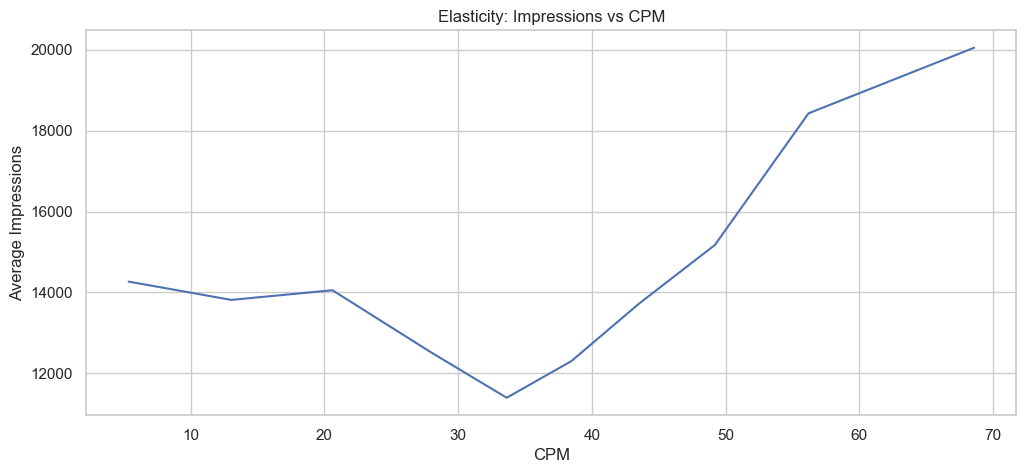

In [51]:
# Grouping by CPM buckets to analyze average impressions
df["CPM_Bin"] = pd.qcut(df["Simulated_CPM"], q=10)
elasticity_summary = df.groupby("CPM_Bin").agg(
    Avg_CPM=("Simulated_CPM", "mean"),
    Avg_Impressions=("Impressions", "mean"),
    Avg_Revenue=("Simulated_Revenue", "mean")
).reset_index()

# Plot revenue vs. impressions
import matplotlib.pyplot as plt
plt.plot(elasticity_summary["Avg_CPM"], elasticity_summary["Avg_Impressions"])
plt.xlabel("CPM")
plt.ylabel("Average Impressions")
plt.title("Elasticity: Impressions vs CPM")
plt.grid(True)
plt.show()

Importing plotly failed. Interactive plots will not work.
18:51:20 - cmdstanpy - INFO - Chain [1] start processing
18:51:21 - cmdstanpy - INFO - Chain [1] done processing


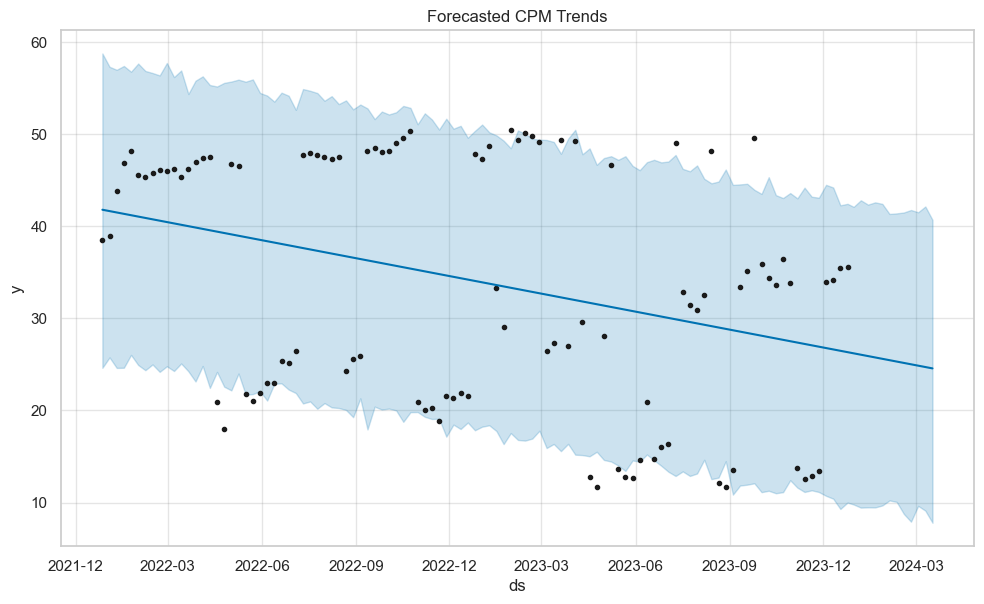

In [52]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 1: Aggregate CPM weekly
weekly = df.groupby("Date").agg({"Winning CPM": "mean"}).reset_index()
weekly.columns = ["ds", "y"]  # Prophet requires 'ds' and 'y' column names

# Step 2: Fit model
model = Prophet()
model.fit(weekly)

# Step 3: Forecast 12 weeks into the future
future = model.make_future_dataframe(periods=12, freq="W")
forecast = model.predict(future)

# Step 4: Plot
model.plot(forecast)
plt.title("Forecasted CPM Trends")
plt.show()


In [53]:
import numpy as np
import pandas as pd

# Step 1: Simulate missing columns if not already present
if "Conversions" not in df.columns:
    print("🧪 'Conversions' column missing — simulating data.")
    df["Conversions"] = df["Impressions"] * np.random.uniform(0.001, 0.02)  # 0.1% to 2% conversion rate

if "Sales" not in df.columns:
    print("🧪 'Sales' column missing — simulating data.")
    df["Sales"] = df["Conversions"] * np.random.uniform(20, 100)  # average order value: $20–$100

# Step 2: Calculate conversion-related metrics
df["Conversion_Rate"] = df["Conversions"] / df["Impressions"]
df["Cost_Per_Conversion"] = df["Simulated_CPM"] / df["Conversion_Rate"]
df["Revenue_Per_Conversion"] = df["Sales"] / df["Conversions"]

# Step 3: Preview calculated values
print("\n✅ Sample conversion performance metrics:")
print(df[[
    "Impressions", "Simulated_CPM", "Conversions", "Sales",
    "Conversion_Rate", "Cost_Per_Conversion", "Revenue_Per_Conversion"
]].head())


🧪 'Conversions' column missing — simulating data.

✅ Sample conversion performance metrics:
   Impressions  Simulated_CPM  Conversions          Sales  Conversion_Rate  \
0     94028.76      39.433533  1768.844718   23487.914104         0.018812   
1    183476.70      43.597687  3451.516234  149977.157161         0.018812   
2     92370.69      43.928402  1737.653533   50818.658810         0.018812   
3    127476.96      62.217013  2398.063606  124825.439232         0.018812   
4     99874.56      43.890346  1878.814395  113334.075179         0.018812   

   Cost_Per_Conversion  Revenue_Per_Conversion  
0          2096.219158               13.278675  
1          2317.578465               43.452543  
2          2335.158719               29.245565  
3          3307.350023               52.052597  
4          2333.135707               60.322124  


📊 Cluster Summary:
   Cluster   CPM_Mean    Impr_Total  Revenue_Total  Num_Segments
0        0  44.203543  2.518627e+08   2.514809e+08           448
1        1  49.234193  1.544318e+08   1.823235e+08             1
2        2  36.838893  8.846585e+08   7.600384e+08            70
3        3  31.761091  1.473257e+09   1.085087e+09          1740


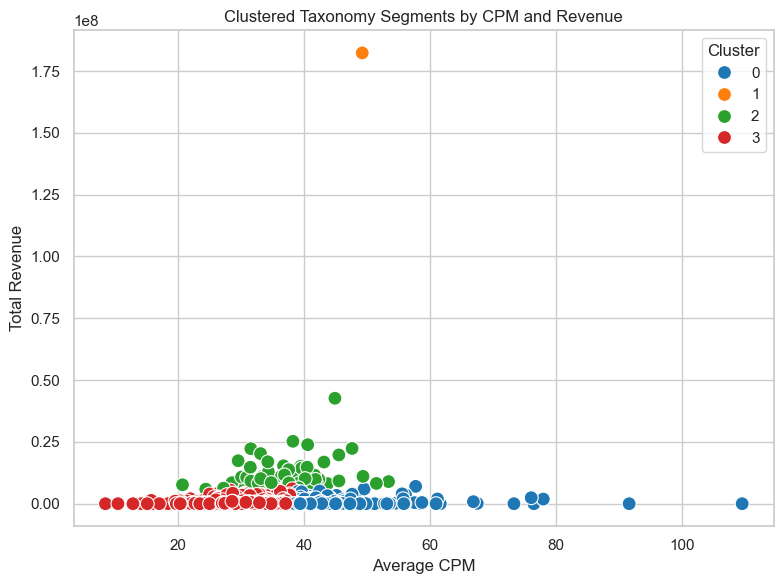

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate features by taxonomy
cluster_features = df.groupby("Taxonomy_Encoded").agg(
    CPM_Mean=("Winning CPM", "mean"),
    Impr_Total=("Impressions", "sum"),
    Revenue_Total=("Sales", "sum")
).reset_index()

# Step 2: Standardize the numeric features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(cluster_features.drop("Taxonomy_Encoded", axis=1))

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_features["Cluster"] = kmeans.fit_predict(X_cluster)

# Step 4: Summarize cluster characteristics
cluster_summary = cluster_features.groupby("Cluster").agg({
    "CPM_Mean": "mean",
    "Impr_Total": "sum",
    "Revenue_Total": "sum",
    "Taxonomy_Encoded": "count"
}).rename(columns={"Taxonomy_Encoded": "Num_Segments"}).reset_index()

print("📊 Cluster Summary:")
print(cluster_summary)

# Step 5: Optional - merge cluster labels back to main df
df = df.merge(cluster_features[["Taxonomy_Encoded", "Cluster"]], on="Taxonomy_Encoded", how="left")

# Step 6: Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cluster_features,
    x="CPM_Mean", y="Revenue_Total",
    hue="Cluster", palette="tab10", s=100
)
plt.title("Clustered Taxonomy Segments by CPM and Revenue")
plt.xlabel("Average CPM")
plt.ylabel("Total Revenue")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [55]:
import streamlit as st
import pandas as pd
import numpy as np
import io

# --- Load or simulate sample data (replace this with actual df loading) ---
@st.cache_data
def load_data():
    np.random.seed(42)
    n = 500
    df = pd.DataFrame({
        "Taxonomy_Encoded": np.random.choice(["A", "B", "C", "D"], size=n),
        "Week": np.random.randint(1, 12, size=n),
        "Predicted_CPM": np.random.uniform(1.0, 5.0, size=n),
        "Impressions": np.random.randint(1000, 10000, size=n)
    })
    return df

df = load_data()

# --- UI ---
st.title("📊 Floor Pricing Simulator")
q = st.slider("Select Quantile for Floor Pricing", 0.1, 0.5, 0.25, step=0.05)

# --- Floor Pricing Logic ---
recommended = df.groupby(["Taxonomy_Encoded", "Week"])["Predicted_CPM"].quantile(q).reset_index()
recommended.columns = ["Taxonomy_Encoded", "Week", "Recommended_Floor"]
merged = df.merge(recommended, on=["Taxonomy_Encoded", "Week"])
merged["Simulated"] = np.maximum(merged["Predicted_CPM"], merged["Recommended_Floor"])
merged["Revenue"] = merged["Simulated"] * merged["Impressions"] / 1000

# --- Output ---
total_revenue = merged["Revenue"].sum()
st.metric("💰 Total Simulated Revenue", f"${total_revenue:,.2f}")
st.dataframe(merged.head(10))

# --- Save & Offer Download ---
csv = merged.to_csv(index=False)
st.download_button(
    label="📥 Download Results as CSV",
    data=csv,
    file_name="simulated_floor_pricing_results.csv",
    mime="text/csv"
)


2025-05-21 19:15:04.975 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-21 19:15:04.980 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-05-21 19:15:04.980 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:15:05.772 
  command:

    streamlit run C:\Users\dshak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-21 19:15:05.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:15:05.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 19:15:05.789 Thread 'MainThread': missing ScriptRunContext! This warni

False

In [56]:
q = 0.25  # or any value you'd like to test
print("Total Revenue:", merged["Revenue"].sum())


Total Revenue: 8122.109771864001
